In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from scipy.stats import norm
import seaborn as sns

sns.set_style("dark")


In [4]:
def drawData(X,Y):
    plt.plot(X,Y,'o')
    plt.title("data points")
    plt.xlabel('x',color='#1C2833')
    plt.ylabel('y',color='#1C2833')
    plt.show()


def drawPolynom(X,Y,w, X_m=[], Y_m=[]):
    predicted = np.dot(X,w)
    plt.plot(X[:,0],Y,'o')
    plt.plot(X[:,0], predicted, 'o',linewidth=1)
    plt.plot(X_m, Y_m, '--')
    plt.title('fitted line')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.show()


def addNoise(Y):
    Y += norm.rvs(size=Y.shape[0])
    return Y


def generatePointsOnLine(shuffle=True, n=100):
    X = np.linspace(-3, 3, n)
    if shuffle:
        np.random.shuffle(X)
    Y = 2*X
    return X,Y


def generateDataset():
    X,Y = generatePointsOnLine()
    Y = addNoise(Y)
    drawData(X,Y)
    return X,Y

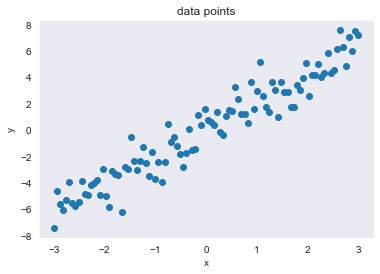

In [5]:
X_gen, Y = generateDataset()

In [6]:

X_gen # выборка x (признаки)


array([-0.09090909, -2.21212121,  0.87878788, -2.39393939, -2.81818182,
        0.6969697 ,  2.33333333, -0.75757576, -0.15151515,  0.15151515,
        3.        ,  0.93939394,  1.        , -0.93939394, -1.42424242,
        2.75757576, -1.54545455, -0.57575758,  2.93939394, -1.48484848,
       -2.15151515,  2.51515152, -0.27272727, -0.39393939, -1.12121212,
       -1.        , -0.81818182, -1.36363636, -1.78787879,  1.96969697,
        1.18181818, -2.09090909, -2.45454545, -1.66666667, -0.6969697 ,
        1.54545455, -1.84848485, -2.93939394, -1.90909091,  2.03030303,
        1.66666667,  0.57575758, -2.51515152, -0.87878788,  0.27272727,
       -1.3030303 ,  0.45454545, -2.87878788,  1.60606061, -2.75757576,
        1.90909091, -1.18181818,  2.45454545, -1.06060606, -2.03030303,
        2.15151515,  1.24242424, -0.03030303,  2.39393939, -0.21212121,
        2.09090909,  0.09090909,  2.81818182,  0.51515152, -0.63636364,
        2.57575758,  0.39393939,  2.21212121, -0.33333333,  0.75

In [15]:

Y # выборка y (ответы)

array([ 0.34184631, -4.02245992,  3.59582179, -4.86987468, -6.06166524,
        1.1953125 ,  4.30407092,  0.42223455,  1.15476563,  0.34525326,
        7.16517978,  1.54333946,  2.94621304, -2.41163666, -2.3738058 ,
        4.80739753, -2.98451861, -1.19147262,  7.52079259, -0.58069176,
       -3.80393039,  4.53760474, -1.55023427, -1.77766964, -3.51670775,
       -3.72774269, -2.43180264, -3.06582102, -3.32266902,  5.06334394,
        1.70329102, -4.94936638, -3.88093616, -6.21028126, -0.92710729,
        2.86723407, -3.09837025, -4.61469261, -5.85260789,  2.56519347,
        1.76228399,  3.22957419, -5.46703523, -3.95498785, -0.15245383,
       -2.38168852,  1.47204655, -5.64937175,  2.88295339, -5.32981376,
        3.96015505, -2.51587447,  4.3079729 , -1.67598056, -2.95271514,
        4.14131172,  1.31521574,  1.56706115,  5.82807465, -1.43511485,
        4.13567126,  0.60830557,  7.04297839,  1.41141862, -0.51412037,
        6.16351831,  1.05118006,  4.96839238,  0.05616103,  1.17

In [8]:
X_gen.shape

(100,)

In [9]:
Y.shape

(100,)

In [10]:
X_gen = X_gen.reshape(-1, 1)


In [11]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.model_selection import train_test_split 
X_gen_train,X_gen_test, Y_train, Y_test = train_test_split(X_gen, Y, test_size=0.2, random_state=0)


In [34]:

regressor = LinearRegression() 
regressor.fit(X_gen_train, Y_train)


LinearRegression()

In [36]:
print(regressor.intercept_)


0.10081763681500436


In [37]:
print(regressor.coef_)


[2.0546538]


In [38]:
Y_pred = regressor.predict(X_gen_test)


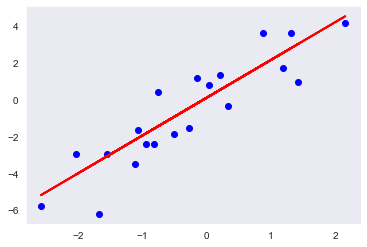

In [44]:
plt.scatter(X_gen_test, Y_test,  color='blue')
plt.plot(X_gen_test, Y_pred, color='red', linewidth=2)
plt.show()